DATA 6100 : Making_a_Model_for_Leaderboard

# Data Pre-Processing

## Data Import

import packages and data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LassoCV, Lasso, RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import itertools
import statsmodels.api as sm


# importing data
train_df = pd.read_csv('Housing_Data_Train.csv')
test_df = pd.read_csv('Housing_Data_Test.csv')
train_df


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,149,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,141000
1,1,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000
2,2,1336,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,167900
3,3,805,20,RL,75.0,9000,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,6,2006,WD,Family,118000
4,4,1396,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,912,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143500
996,996,916,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
997,997,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
998,998,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


combine training data and testing data to a whole dataset and find NAs

In [ ]:
# split input and output
x_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

#combine training and testing data to find NAs

train_df['data_source'] = 'train'
test_df['data_source'] = 'test'
whole_dataset = pd.concat([train_df, test_df], axis=0)

whole_dataset.groupby('data_source').apply(lambda x: x.isna().sum()[x.isna().sum() > 0])

<ipython-input-2-819e3a1ff491>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  whole_dataset.groupby('data_source').apply(lambda x: x.isna().sum()[x.isna().sum() > 0])


data_source              
test         LotFrontage      73
             Alley           422
             MasVnrType      270
             MasVnrArea        2
             BsmtQual         11
             BsmtCond         11
             BsmtExposure     11
             BsmtFinType1     11
             BsmtFinType2     11
             FireplaceQu     220
             GarageType       17
             GarageYrBlt      17
             GarageFinish     17
             GarageQual       17
             GarageCond       17
             PoolQC          445
             Fence           354
             MiscFeature     428
             SalePrice       446
train        LotFrontage     186
             Alley           934
             MasVnrType      596
             MasVnrArea        6
             BsmtQual         25
             BsmtCond         25
             BsmtExposure     26
             BsmtFinType1     25
             BsmtFinType2     26
             Electrical        1
             FireplaceQu     465
             GarageType       61
             GarageYrBlt      61
             GarageFinish     61
             GarageQual       61
             GarageCond       61
             PoolQC          995
             Fence           815
             MiscFeature     964
dtype: int64

## Missing Values

Missing Values appears in
 'LotFrontage',
 'Alley',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature'

Plot the numerical missing values :LotFrontage, MasVnrArea
And plot the only one NA: Electrical

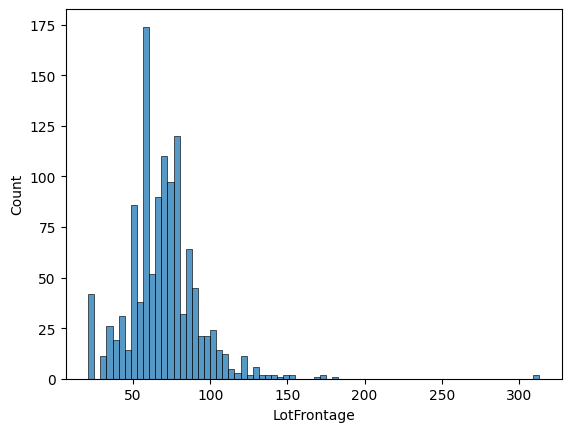

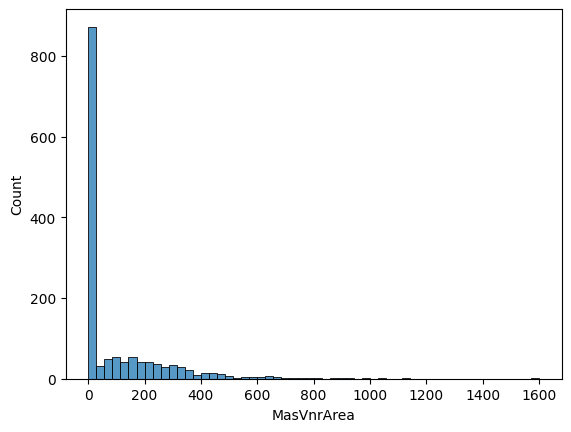

<Axes: >

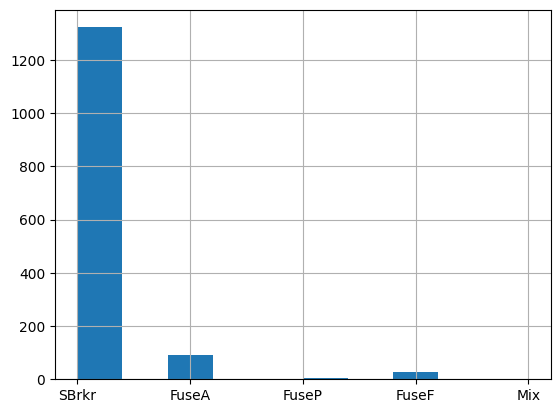

In [ ]:
# plot the data to find substitution
sns.histplot(whole_dataset['LotFrontage'])
plt.show()

sns.histplot(whole_dataset['MasVnrArea'])
plt.show()

whole_dataset['Electrical'].hist()

After plotting the frequency of values of "LotFrontage", i would prefer use the median value to substitute the missing values in LotFrontage.

For "MasVnrArea", as most data are 0, i will use 0 to substitute missig values.

For "Elctrical" is having only 1 missing value, i will treat it as the mode "SBrkr".

For "GarageYrBlt", the missing values are those house without garage, so i will put the year of 1900 as the substitution.

As "Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC" ,"Fence", "MiscFeature" are categorical columns, NA is not simply missing, i will use encoding on these columns.

## Substitution

In [ ]:
# Substitute Missing Values
substitute_values = {
    'LotFrontage': whole_dataset['LotFrontage'].median(),
    'MasVnrArea': 0,
    'Electrical': 'SBrkr',
    'GarageYrBlt': 1900
}
whole_dataset.fillna(substitute_values, inplace=True)

# check NAs again
whole_dataset.groupby('data_source').apply(lambda x: x.isna().sum()[x.isna().sum() > 0])

<ipython-input-4-bda1cee7673a>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  whole_dataset.groupby('data_source').apply(lambda x: x.isna().sum()[x.isna().sum() > 0])


data_source              
test         Alley           422
             MasVnrType      270
             BsmtQual         11
             BsmtCond         11
             BsmtExposure     11
             BsmtFinType1     11
             BsmtFinType2     11
             FireplaceQu     220
             GarageType       17
             GarageFinish     17
             GarageQual       17
             GarageCond       17
             PoolQC          445
             Fence           354
             MiscFeature     428
             SalePrice       446
train        Alley           934
             MasVnrType      596
             BsmtQual         25
             BsmtCond         25
             BsmtExposure     26
             BsmtFinType1     25
             BsmtFinType2     26
             FireplaceQu     465
             GarageType       61
             GarageFinish     61
             GarageQual       61
             GarageCond       61
             PoolQC          995
             Fence           815
             MiscFeature     964
dtype: int64

Then, looking at those other columns. "id" does not seem to have a linear relationship with the SalePrice, so i would not fix the data as i believe it would be cleared after parameter selection. And for other numeric columns, i will keep them original. And for'MSSubClass', i will treat it as categorical.

## Numerical Data

By rule of thumb, Id and MSSubClass seems useless in predicting response, so plot them.

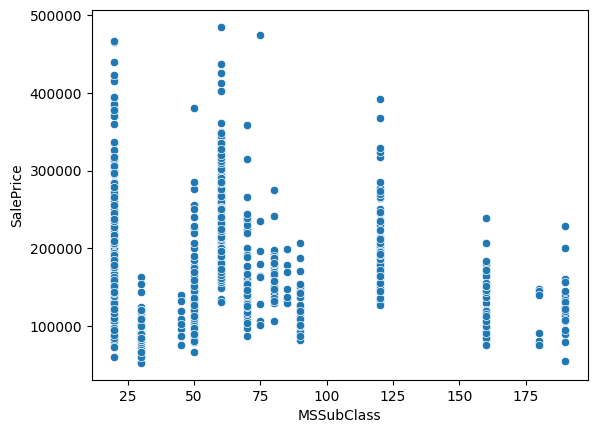

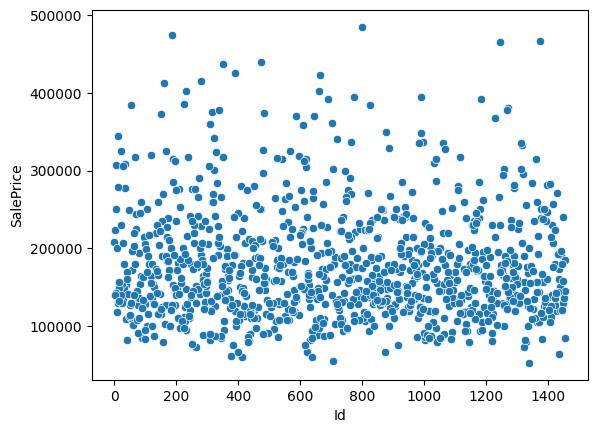

In [ ]:
# Do scatterplot with response to find trend of linear relationship
sns.scatterplot(x='MSSubClass', y='SalePrice', data=train_df)
plt.show()
sns.scatterplot(x='Id', y='SalePrice', data=train_df)
plt.show()

As no obvious linearship exists, i will not do extra work on them.And as there exists too many categories in each column, i wont do one hot encoding on them.

## Categorical Data

Now process the encoding on those categorical columns: "MSZoning", "Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","Electrical","KitchenQual","Functional","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"

Special Cases are: "condition1","condition2" and "Exterior1st","Exterior2nd", "BsmtFinType1", "BsmtFinType2"

### Ordinal Encoding




Also, there might be a order relation in "ExterQual","ExterCond", "BsmtQual","BsmtCond", "Heating", "HeatingQC", "KitchenQual","FireplaceQu","GarageType","GarageFinish", "GarageQual", "GarageCond", "PavedDrive","PoolQC" i will plot the plot and do encoding other than one-hot.

Besides, the yaers variable are hard to deal with: "MoSold","YrSold","GarageYrBlt","YearBuilt","YearRemodAdd"

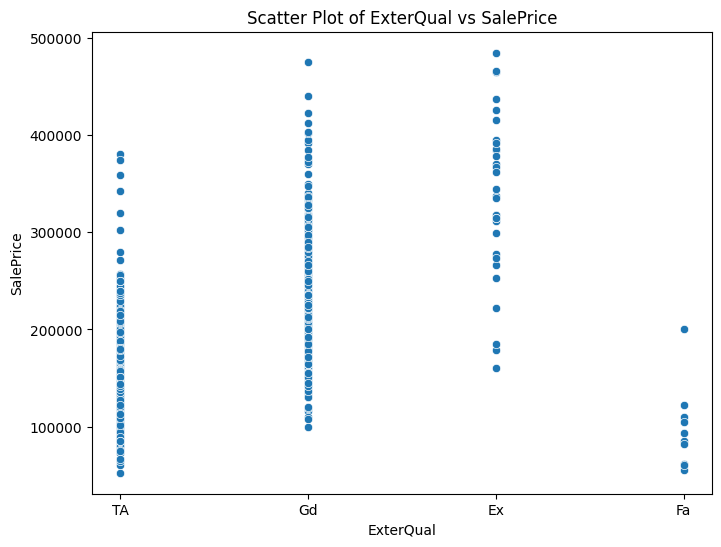

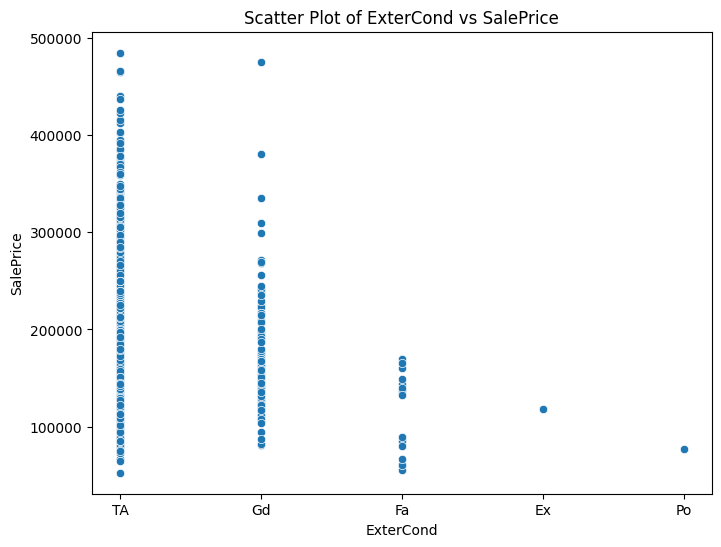

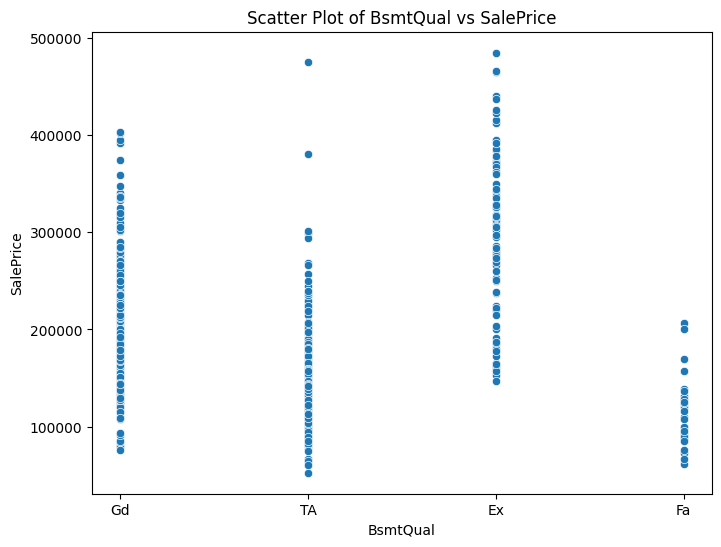

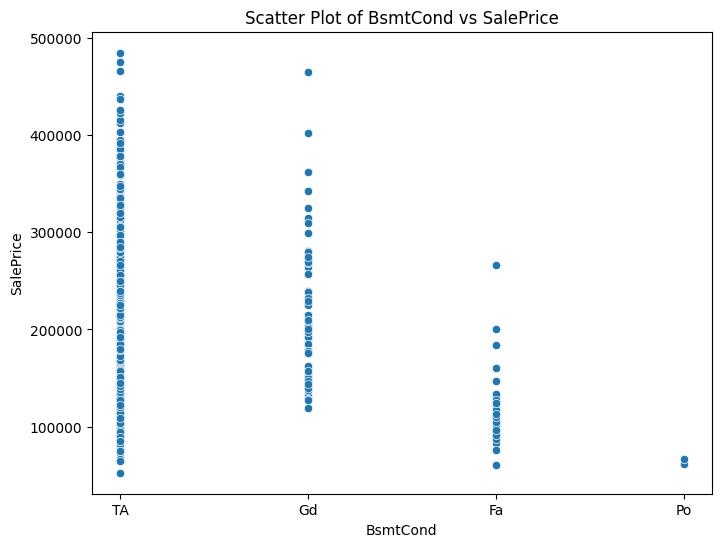

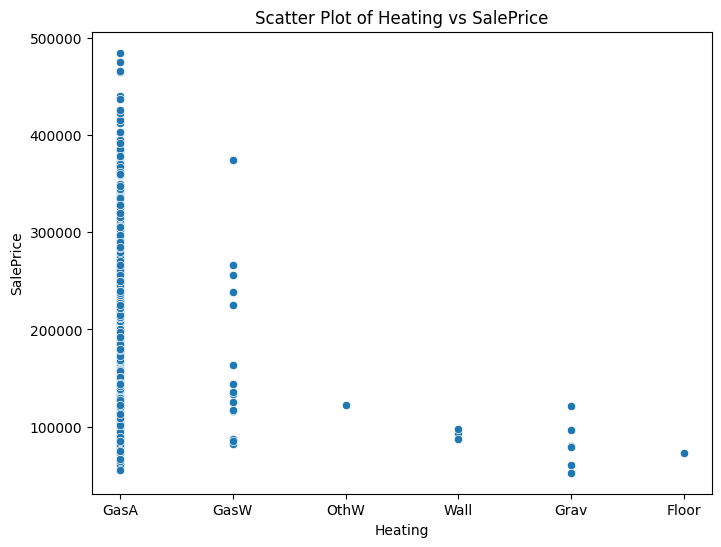

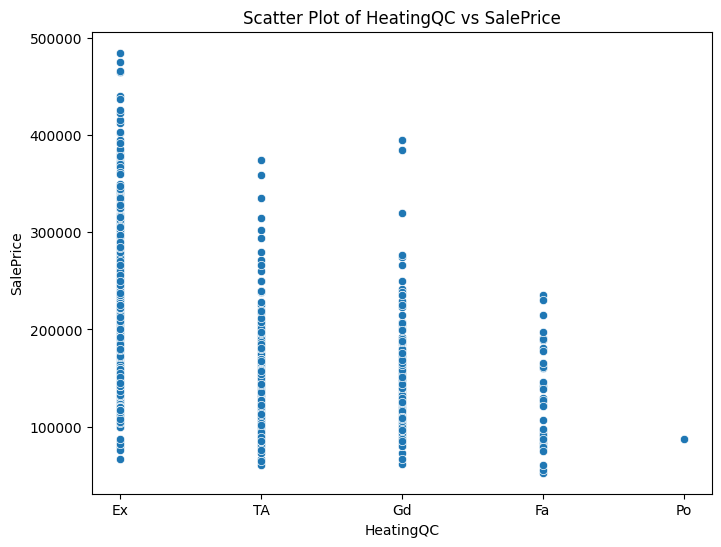

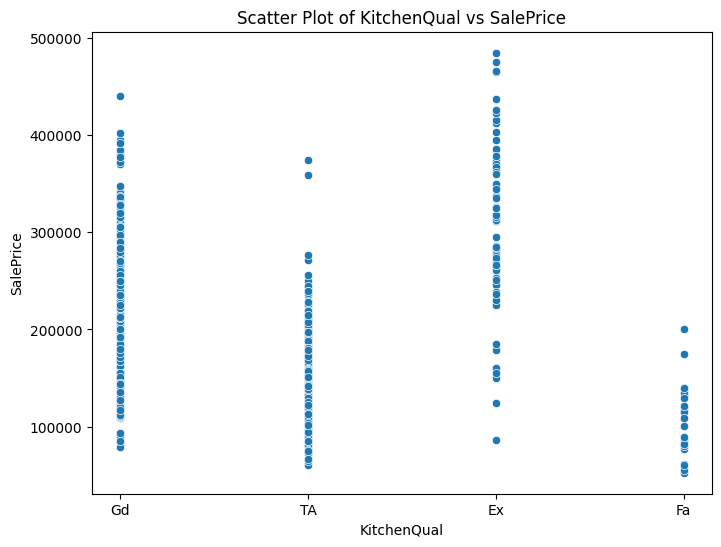

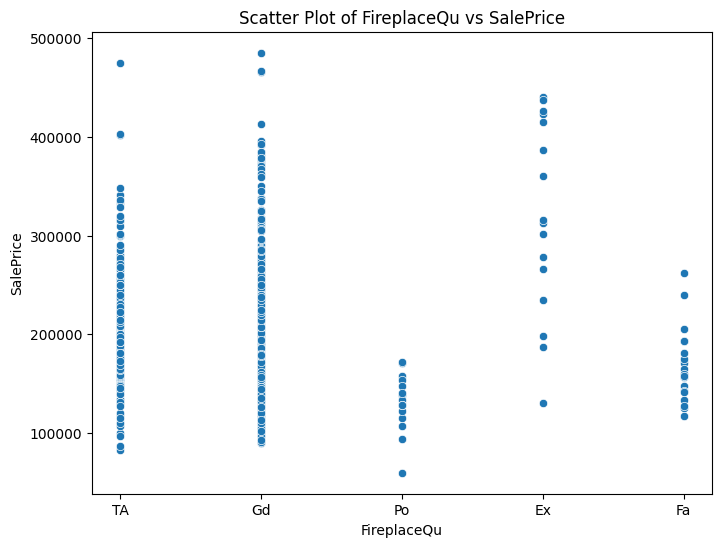

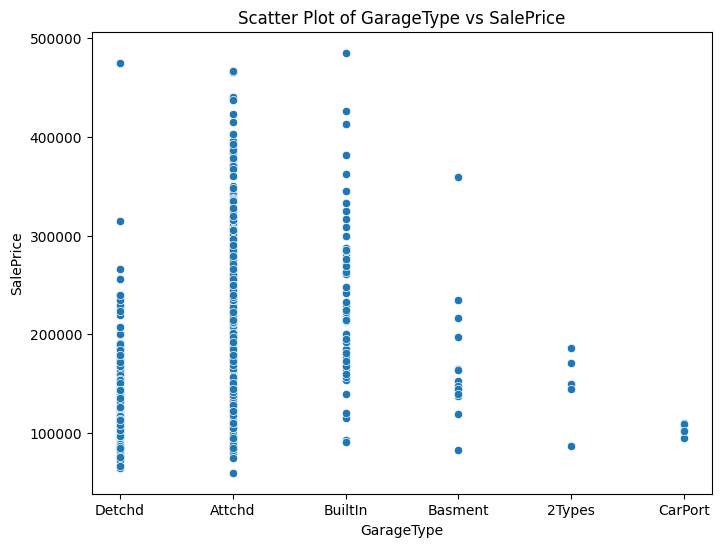

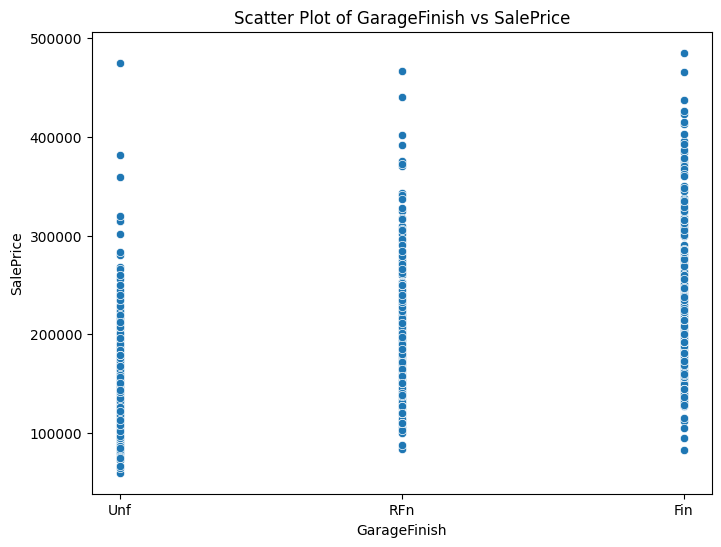

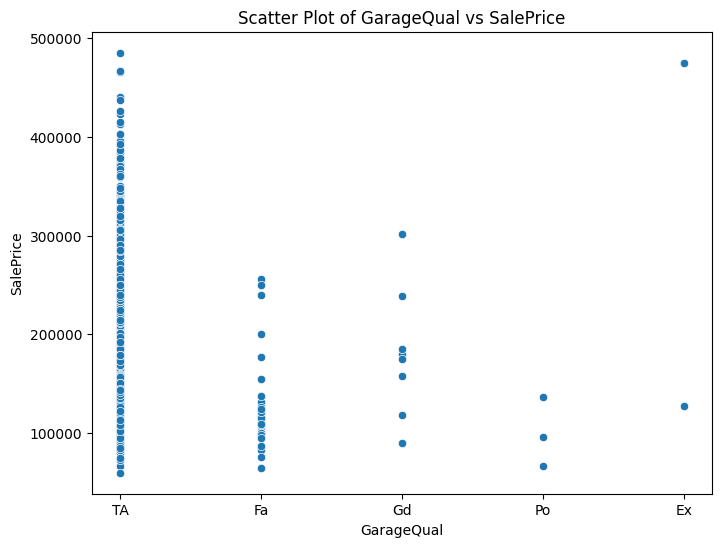

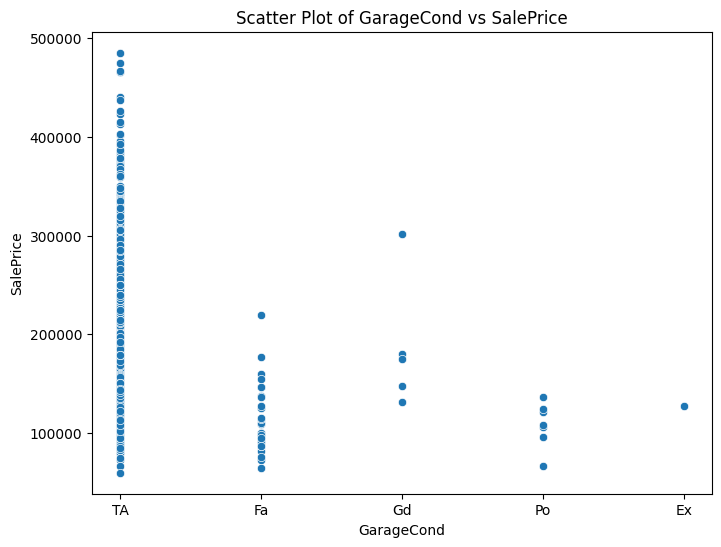

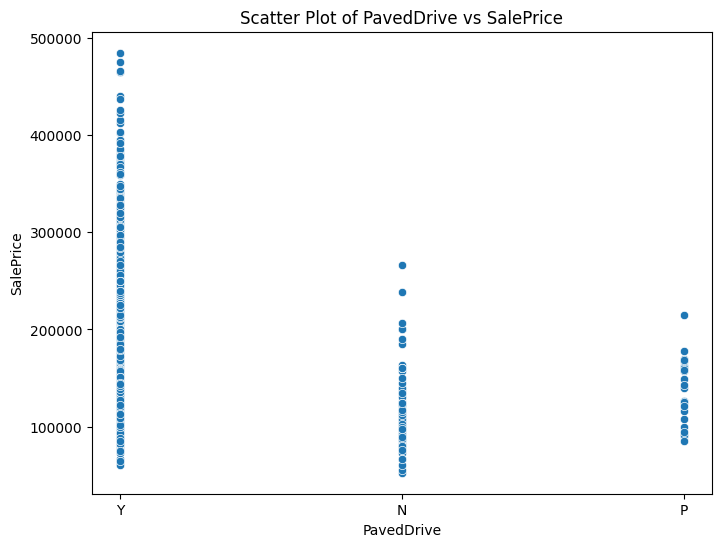

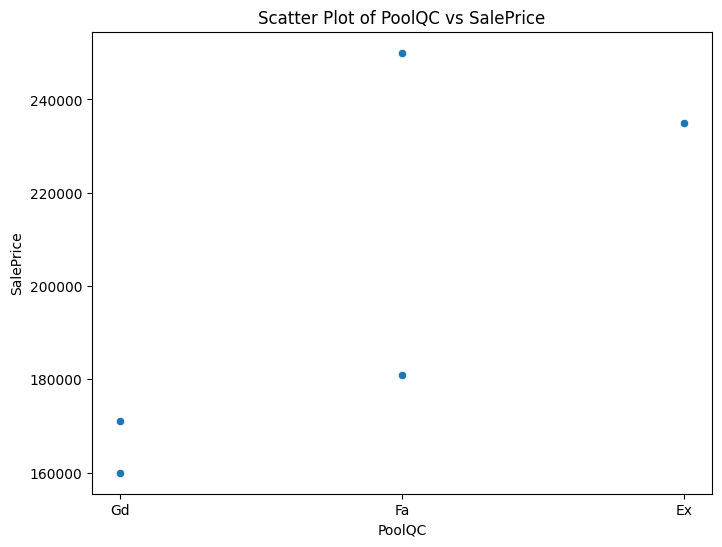

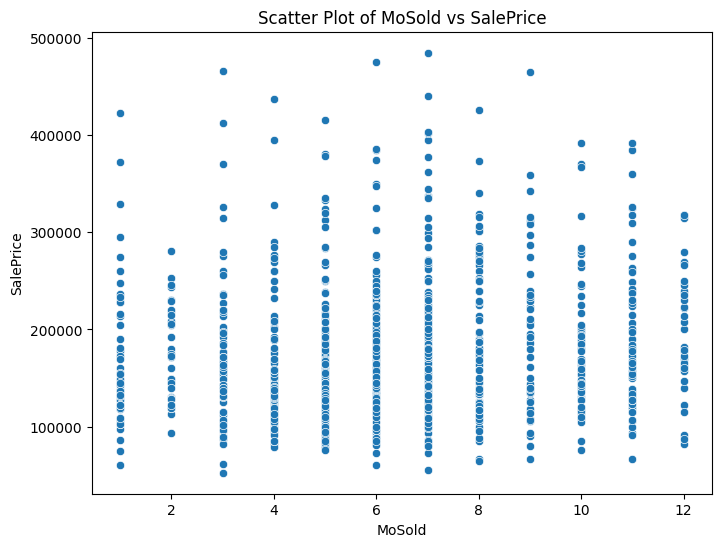

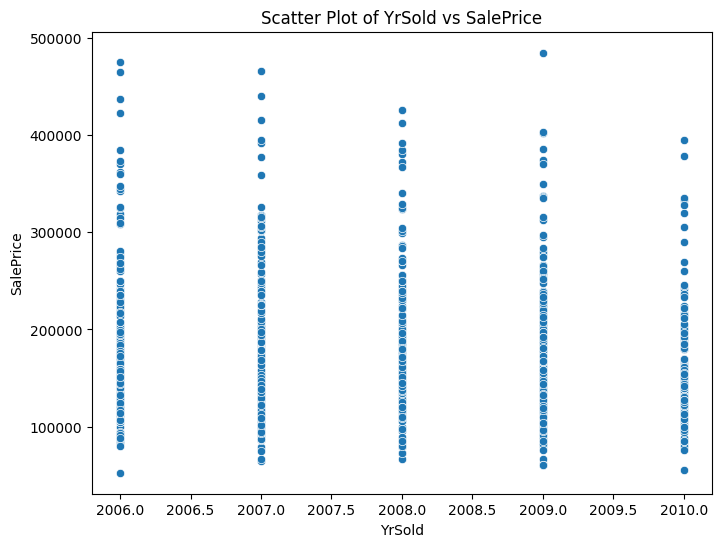

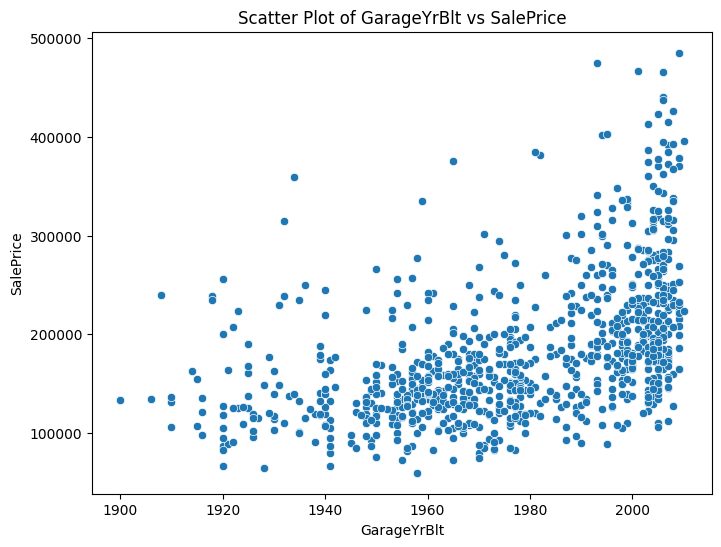

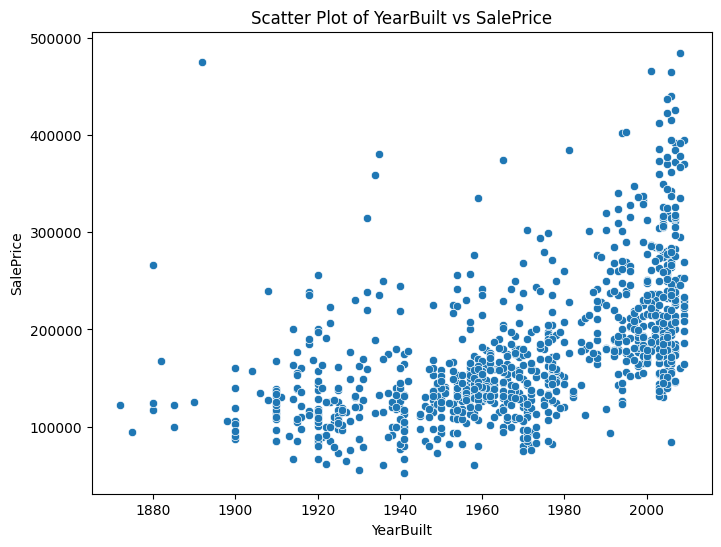

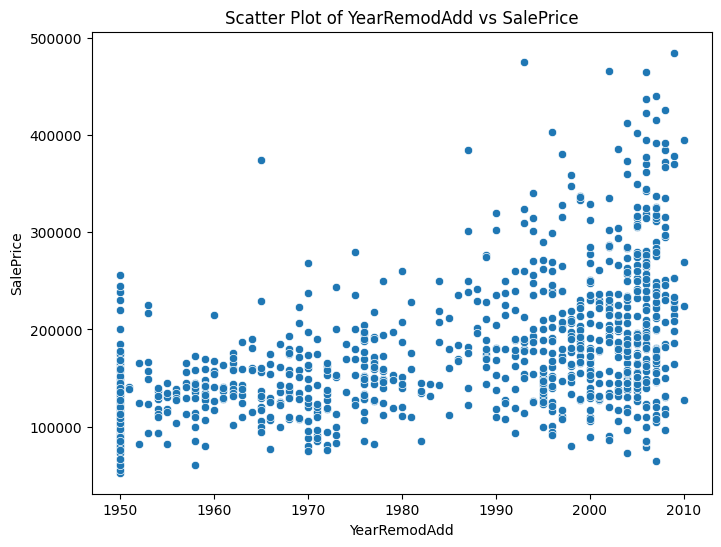

In [ ]:
# Loop through the potential categorical columns and create scatter plots to find the columns which are ordinal encoding appliable.
for column in ["ExterQual","ExterCond", "BsmtQual","BsmtCond", "Heating","HeatingQC", "KitchenQual","FireplaceQu","GarageType","GarageFinish", "GarageQual", "GarageCond", "PavedDrive","PoolQC","MoSold","YrSold","GarageYrBlt","YearBuilt","YearRemodAdd"]:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=column, y="SalePrice", data=train_df)
  plt.title(f"Scatter Plot of {column} vs SalePrice")
  plt.xlabel(column)
  plt.ylabel("SalePrice")
  plt.show()

After the plot, i believe ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual, GarageCond, PavedDrive,PoolQc, is having positive correlations, thus, i will use ordinal Encoding on these columns. For GarageYrBlt, YearBuilt, YearRemodAdd, i believe there exists positive relationship between sale price and these variables, and maybe on YrSold but not for MoSold, so i will do onehot encoding on Mosold

## Encoding

In [ ]:
categorical_cols_onehot = ["MSSubClass","MSZoning", "Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","BldgType","HouseStyle","RoofStyle","RoofMatl","MasVnrType","Foundation","BsmtExposure","Heating","Electrical","Functional","GarageType","Fence","MiscFeature","MoSold","SaleType","SaleCondition"]
categorical_cols_ordinal = ["ExterQual","ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond","PoolQC"]
categorical_cols_true_false =["CentralAir"]
exceptioal_cols = ['GarageFinish','PavedDrive']

# do one-hot encoding
whole_dataset_encoding =pd.get_dummies(whole_dataset, columns=categorical_cols_onehot, dummy_na=True, dtype=int)

# do ordinal encoding for YES and NO
true_false_mapping = {
    'Y': 1,
    'N': 0,
    'NA': 0
}
for column in categorical_cols_true_false:
    whole_dataset_encoding[column] = whole_dataset_encoding[column].map(true_false_mapping)

# do ordinal encoding for Ex and Gd
values = whole_dataset_encoding["GarageFinish"].unique()
ordinal_mapping = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0
}



for column in categorical_cols_ordinal:
    whole_dataset_encoding[column] = whole_dataset_encoding[column].fillna('NA')
    whole_dataset_encoding[column] = whole_dataset_encoding[column].map(ordinal_mapping)

# do ordinal encoding for Unf and Fin
exceptioal_mapping = {
    'Unf': 1,
    'RFn': 2,
    'Fin': 3,
    'NA': 0,
    'Y' : 3,
    'P' : 2,
    'N' : 1
}

for column in exceptioal_cols:
    whole_dataset_encoding[column] = whole_dataset_encoding[column].fillna('NA')
    whole_dataset_encoding[column] = whole_dataset_encoding[column].map(exceptioal_mapping)

## Special Cases


Now it comes to "condition1","condition2" and "Exterior1st","Exterior2nd", i will encode these and combine these results with or operator.

For Condition1 and Condition2, the possible input is Artery, Feedr, Norm, RRNn, RRAn, PosN, PosA, RRNe, RRAe, create seperate columns for these values and fill in 1 or 0 based on the element in Condition1 and Condition2

For Exterior1st and Exterior2nd, the possible input is AsbShng,
       AsphShn	,
       BrkComm	,
       BrkFace	,
       CBlock	,
       CemntBd	,
       HdBoard	,
       ImStucc	,
       MetalSd	,
       Other	,
       Plywood	,
       PreCast	,
       Stone	,
       Stucco	,
       VinylSd	,
       Wd Sdng	,
       WdShing	, create mapping and do teh same procedure

In [ ]:
# Combine the output of 2 columns
Condition_mapping = {
    'Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'
}

for condition in Condition_mapping:
    whole_dataset_encoding[condition] = (whole_dataset_encoding['Condition1'] == condition) | (whole_dataset_encoding['Condition2'] == condition)

for condition in Condition_mapping:
    whole_dataset_encoding[condition] = whole_dataset_encoding[condition].astype(int)


Exterior_mapping = {
    'AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'
}

for condition in Exterior_mapping:
    whole_dataset_encoding[condition] = (whole_dataset_encoding['Exterior1st'] == condition) | (whole_dataset_encoding['Exterior2nd'] == condition)

for condition in Exterior_mapping:
    whole_dataset_encoding[condition] = whole_dataset_encoding[condition].astype(int)

whole_dataset_encoding.head()



,Unnamed: 0,Id,LotFrontage,LotArea,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Other,VinylSd,BrkComm,AsphShn,CemntBd,PreCast,Plywood,CBlock,HdBoard,AsbShng
0,0,149,63.0,7500,Norm,Norm,7,5,2004,2005,...,0,1,0,0,0,0,0,0,0,0
1,1,460,69.0,7015,Norm,Norm,5,4,1950,1950,...,0,0,0,0,0,0,0,0,0,0
2,2,1336,80.0,9650,Norm,Norm,6,5,1977,1977,...,0,0,0,0,0,0,1,0,0,0
3,3,805,75.0,9000,Norm,Norm,5,5,1954,1954,...,0,0,0,0,0,0,0,0,0,0
4,4,1396,88.0,12665,Norm,Norm,8,5,2005,2006,...,0,1,0,0,0,0,0,0,0,0


For BsmtSFinType, the possible outcome is GLQ,ALQ,BLQ,Rec,LwQ, fill the corrsponding value to the columns.

In [ ]:
# combine the output of 2 columns and fillin BsmtFinSF
BsmtSFinType_mapping = {
    'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ'}

for condition in BsmtSFinType_mapping:
    whole_dataset_encoding[condition] = (whole_dataset_encoding['BsmtFinType1'] == condition) * whole_dataset_encoding['BsmtFinSF1'] + \
                                       (whole_dataset_encoding['BsmtFinType2'] == condition) * whole_dataset_encoding['BsmtFinSF2']


for condition in BsmtSFinType_mapping:
    whole_dataset_encoding[condition] = whole_dataset_encoding[condition].astype(int)

whole_dataset_encoding.head()

,Unnamed: 0,Id,LotFrontage,LotArea,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,PreCast,Plywood,CBlock,HdBoard,AsbShng,BLQ,LwQ,GLQ,Rec,ALQ
0,0,149,63.0,7500,Norm,Norm,7,5,2004,2005,...,0,0,0,0,0,0,0,680,0,0
1,1,460,69.0,7015,Norm,Norm,5,4,1950,1950,...,0,0,0,0,0,0,185,0,0,0
2,2,1336,80.0,9650,Norm,Norm,6,5,1977,1977,...,0,1,0,0,0,0,0,0,0,686
3,3,805,75.0,9000,Norm,Norm,5,5,1954,1954,...,0,0,0,0,0,0,812,0,0,0
4,4,1396,88.0,12665,Norm,Norm,8,5,2005,2006,...,0,0,0,0,0,0,0,0,0,0


## Standardization

All paramaters are processed, do standardization.

In [ ]:
# Make sure no NAs in the dataset
whole_dataset_standardization = whole_dataset_encoding.drop(columns=['Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2'])
whole_dataset_standardization.groupby('data_source').apply(lambda x: x.isna().sum()[x.isna().sum() > 0])




<ipython-input-10-e85020c1d2bf>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  whole_dataset_standardization.groupby('data_source').apply(lambda x: x.isna().sum()[x.isna().sum() > 0])


,,0
data_source,,
test,SalePrice,446


In [ ]:
# do standardization except for y and data-source
for column in whole_dataset_standardization.columns:
    if column != 'SalePrice' and column != 'data_source':
        scaler = StandardScaler()
        whole_dataset_standardization[[column]] = scaler.fit_transform(whole_dataset_standardization[[column]])

whole_dataset_standardization.head()


,Unnamed: 0,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,PreCast,Plywood,CBlock,HdBoard,AsbShng,BLQ,LwQ,GLQ,Rec,ALQ
0,-1.472150,-1.377482,-0.308728,-0.297511,0.674171,-0.524343,1.088560,0.978212,0.113350,-0.690027,...,0.0,-0.345246,-0.026307,-0.439397,-0.124296,-0.324993,-0.243360,1.021797,-0.326591,-0.386107
1,-1.468595,-0.640855,-0.034120,-0.346362,-0.808493,-1.423749,-0.704519,-1.694496,0.349473,-0.690027,...,0.0,-0.345246,-0.026307,-0.439397,-0.124296,-0.324993,1.292773,-0.523958,-0.326591,-0.386107
2,-1.465039,1.434017,0.469328,-0.080956,-0.067161,-0.524343,0.192020,-0.382439,1.495534,-0.690027,...,0.0,2.896482,-0.026307,-0.439397,-0.124296,-0.324993,-0.243360,-0.523958,-0.326591,2.231592
3,-1.461484,0.176303,0.240488,-0.146426,-0.808493,-0.524343,-0.571698,-1.500117,-0.577742,-0.690027,...,0.0,-0.345246,-0.026307,-0.439397,-0.124296,-0.324993,6.499017,-0.523958,-0.326591,-0.386107
4,-1.457928,1.576132,0.835472,0.222724,1.415503,-0.524343,1.121765,1.026806,0.833238,1.079085,...,0.0,-0.345246,-0.026307,-0.439397,-0.124296,-0.324993,-0.243360,-0.523958,-0.326591,-0.386107


# Modelling and Model Tuning

In [ ]:
# split the data from the whole dataset to training data and testing data and drop the data_source column

training_standardization = whole_dataset_standardization[whole_dataset_standardization['data_source'] == 'train']
test_standardization = whole_dataset_standardization[whole_dataset_standardization['data_source'] == 'test']
training_standardization = training_standardization.drop(columns=['data_source','SalePrice'])
test_standardization = test_standardization.drop(columns=['data_source','SalePrice'])
y = whole_dataset_standardization['SalePrice'][whole_dataset_standardization['data_source'] == 'train']

## Linear Regression

In [ ]:
# try linear regression using the 270 parameters

model = LinearRegression()
model.fit(training_standardization, y)
predictions = model.predict(test_standardization)
predictions
model.score(training_standardization, y)



0.9217403633734387

I got R^2 = 92%, how ever, i am using whole 270 parameters, it must be overfitting.

In [ ]:
list_predictions = predictions.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
print(rounded_list_predictions)

[209241, 158004, 115508, 133559, 125966, 273114, 33878, 181453, 153765, 153497, 146522, 273768, 266290, 178139, 172617, 417708, 112358, 155126, 221307, 69365, 111633, 185913, 157388, 189434, 125889, 108404, 194422, 194842, 186432, 107614, 120180, 132835, 307707, 253605, 168456, 171144, 130536, 122572, 214231, 210553, 161857, 169897, 205383, 107150, 120136, 103954, 136239, 234723, 284535, 175026, 283926, 7290717926307855, 160029, 192576, 162608, 178209, 127533, 193809, 130133, 146326, 97442, 98951, 151211, 125505, 224260, 245897, 185814, 218152, 280912, 95470, 221694, 253585, 79976, 241330, 192377, 219981, 111828, 187272, 112755, 153757, 140973, 176965, 232224, 245865, 109485, 253611, 270387, 140272, 249896, 162755, 162986, 185576, 335650, 150197, 125432, 108017, 123546, 218382, 149824, 91736, 187829, 135072, 305705, 170423, 128520, 96381, 201078, 141572, 250233, 345087, 216986, 204540, 81045, 140553, 111165, 135538, 119744, 208528, 268016, 289093, 263222, 204424, 311580, 145783, 108097

For this one, i get score = 4651957683133456, which is unbelieveable.

In [ ]:
#split the training data
x_train, x_test, y_train, y_test = train_test_split(training_standardization, y, test_size=0.2, random_state=6)



## Forward Stepwise

I will try forwardsteping now. And i got 24415 for test RMSE.


In [ ]:
# forward stepping

def forward_selection(x, y):

    remaining_features = list(x.columns)
    selected_features = []
    current_score = 999999999

    while remaining_features:
        best_new_feature = None
        best_new_score = 999999999
        for new_feature in remaining_features:
            features_to_use = selected_features + [new_feature]
            model = sm.OLS(y, sm.add_constant(x[features_to_use])).fit()
            new_score = model.aic

            if new_score < best_new_score:
                best_new_score = new_score
                best_new_feature = new_feature

        if best_new_feature is not None and best_new_score < current_score:
            selected_features.append(best_new_feature)
            remaining_features.remove(best_new_feature)
            current_score = best_new_score
        else:
            break
    return selected_features

# the selected feature on splitted training data only
selected_features = forward_selection(training_standardization, y)
print(f"Selected features using forward selection: {selected_features}")




Selected features using forward selection: ['OverallQual', 'GrLivArea', 'GarageCars', 'BsmtFullBath', 'RoofMatl_ClyTile', 'TotalBsmtSF', 'KitchenQual', 'Neighborhood_NridgHt', 'LotArea', 'BldgType_1Fam', 'GLQ', 'YearBuilt', 'OverallCond', 'BsmtExposure_Gd', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Neighborhood_NoRidge', 'RoofMatl_WdShngl', 'Neighborhood_StoneBr', 'BrkFace', 'Norm', 'SaleCondition_Normal', 'Neighborhood_Somerst', 'Fireplaces', 'BsmtExposure_No', 'PosN', 'LotShape_IR2', 'Functional_Typ', 'WoodDeckSF', 'GarageType_nan', 'RRAe', 'LotConfig_CulDSac', 'ScreenPorch', 'MoSold_10.0', 'RoofStyle_Gable', 'ExterQual', 'BsmtUnfSF', 'Neighborhood_BrkSide', 'LandContour_HLS', 'MasVnrType_Stone', 'HouseStyle_1Story', 'TotRmsAbvGrd', 'BedroomAbvGr', 'BldgType_2fmCon', 'HouseStyle_2.5Unf', 'LandContour_Bnk', 'Artery', 'LotShape_IR3', 'MetalSd', 'Heating_OthW', 'FireplaceQu', 'SaleType_CWD', 'Foundation_BrkTil', 'GarageType_2Types', 'Stucco', 'Fence_GdPrv', 'HalfBath', 'Neighbor

After training the model on the train data, i get the set of parameters which lead to the lowest test error and i store it in selected features.

Do the same procedure on the whole training data to get a better model.

In [ ]:
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'BsmtFullBath', 'RoofMatl_ClyTile', 'TotalBsmtSF', 'KitchenQual', 'Neighborhood_NridgHt', 'LotArea', 'BldgType_1Fam', 'GLQ', 'YearBuilt', 'OverallCond', 'BsmtExposure_Gd', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Neighborhood_NoRidge', 'RoofMatl_WdShngl', 'Neighborhood_StoneBr', 'BrkFace', 'Norm', 'SaleCondition_Normal', 'Neighborhood_Somerst', 'Fireplaces', 'BsmtExposure_No', 'PosN', 'LotShape_IR2', 'Functional_Typ', 'WoodDeckSF', 'GarageType_nan', 'RRAe', 'LotConfig_CulDSac', 'ScreenPorch', 'MoSold_10.0', 'RoofStyle_Gable', 'ExterQual', 'BsmtUnfSF', 'Neighborhood_BrkSide', 'LandContour_HLS', 'MasVnrType_Stone', 'HouseStyle_1Story', 'TotRmsAbvGrd', 'BedroomAbvGr', 'BldgType_2fmCon', 'HouseStyle_2.5Unf', 'LandContour_Bnk', 'Artery', 'LotShape_IR3', 'MetalSd', 'Heating_OthW', 'FireplaceQu', 'SaleType_CWD', 'Foundation_BrkTil', 'GarageType_2Types', 'Stucco', 'Fence_GdPrv', 'HalfBath', 'Neighborhood_Timber', 'Neighborhood_NPkVill', 'LotShape_IR1', 'Neighborhood_Edwards', 'SaleCondition_AdjLand', 'Neighborhood_OldTown', 'VinylSd', 'SaleType_Con', 'MasVnrArea', 'Utilities_AllPub', 'Other', 'Neighborhood_Blmngtn', 'Functional_Maj2', 'MoSold_2.0', 'MSSubClass_190.0', 'ExterCond', 'LotConfig_FR2']
len(selected_features)

# apply to whole training dataset
model_forward = sm.OLS(y, sm.add_constant(training_standardization[selected_features])).fit()
print(model_forward.summary())

x_test_forward = sm.add_constant(test_standardization[selected_features],has_constant='add')
y_pred_forward_test = model_forward.predict(x_test_forward)

list_predictions = y_pred_forward_test.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
print(rounded_list_predictions)



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sun, 27 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:25:20   Log-Likelihood:                -11366.
No. Observations:                1000   AIC:                         2.288e+04
Df Residuals:                     925   BIC:                         2.325e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.783e+

## Lasso

And now, i will try one last method: Lasso

\begin{equation}
    \underset{\beta}{\text{minimize}} \; \left( \sum_{i=1}^n \left( y_i - \sum_{j=1}^p X_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^p |\beta_j| \right)
\end{equation}

This is the loss function of Lasso, where consists of RSS term and penalty term which helps to make the trade-off between bias and variance. With a small lambda chosen, there's almost no penalty given on the coefficient chosen, then the variance would be high and bias would be low as the funciton will be wiggly enough to fit most points, which cause the over-fitting.But when a big lambda is chosen, there's considerable penalty placed on the coefficients, the variance would become lower, but the bias increase as the model is not that flexable anymore.Thus the model is now under-fitting.

In [ ]:



#Use LassoCV to find the best alpha
lasso_cv = LassoCV(cv=5, random_state=6)
lasso_cv.fit(training_standardization, y)

# Get the best alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

#Fit the Lasso model on the whole dataset using the best alpha i found
lasso_model = Lasso(alpha=980)
lasso_model.fit(training_standardization,y)

# Evaluate the model
train_score = lasso_model.score(training_standardization,y)

# also output the rmse of the training_standardization

train_y_pred = lasso_model.predict(training_standardization)
rmse = np.sqrt(mean_squared_error(y, train_y_pred))

print(f"RMSE: {rmse}")
print(f"Training score: {train_score}")


# Make predictions
y_pred = lasso_model.predict(test_standardization)
print(f"Predictions: {y_pred}")

list_predictions = y_pred.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
print(rounded_list_predictions)

#check coefficients
print(lasso_model.coef_)
# print number of non-zero coefficients
print(np.sum(lasso_model.coef_ != 0))

Best alpha: 1239.4822210953603
RMSE: 22399.204172259604
Training score: 0.901696500742301
Predictions: [190266.82670124 160440.65262656  96014.19584762 152262.08516184
 131437.96043948 265643.44997756  38732.11741546 186155.05228334
 147644.26721263 150032.56509693 136092.12283148 284364.98034278
 255007.90161111 174369.03225407 164397.86365473 382927.40651677
 114155.88414078 173649.03314628 218400.23645567  74657.51868129
 111766.51126297 189326.62780012 167362.56090949 192935.00243204
 111265.07834918 122804.39307892 193476.90531094 193347.83275985
 186701.97116661 114682.09554029 108603.97671986 147518.09910741
 304329.97746795 226392.73018439 157529.06952426 179238.38937458
 103775.98673854 136353.74956337 214523.0884552  216040.08514219
 155695.77774088 165705.37751427 198999.42242772 132109.17790571
 145403.4702071  103225.06348968 119136.37148474 222356.24592745
 274060.73070758 160214.76221362 260201.70063659 147660.15337572
 134663.78675327 207883.03448642 171523.52955978 188

We can also tell the function of the penalty term of lasso, as most parameters who does not have a linear relationship with saleprice are dropped(coefficients set to 0).The ID and MSSubClass are penalized to 0 as i expected, so i does not need to remove them at first, lasso will do the cleaning as well.

# Demonstration of Overfitting vs Underfitting

I will use lasso to demonstrate overfitting and under fitting.The penalty term of lasso :

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.686e+10, tolerance: 3.870e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+08, tolerance: 3.870e+08
  model = cd_fast.enet_coordinate_descent(


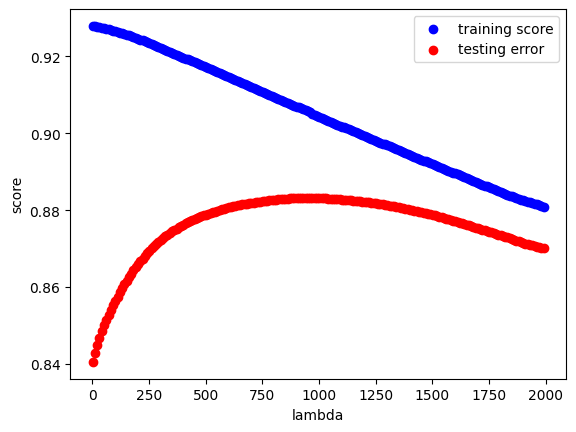

In [ ]:
#split data
x_train, x_test, y_train, y_test = train_test_split(training_standardization, y, test_size=0.25, random_state=6)

plot_lambda = []
plot_train_score = []
plot_test_score = []
for alpha in range(1, 2000, 10):
    lasso_model = Lasso(alpha = alpha)
    lasso_model.fit(x_train, y_train)
    train_score = lasso_model.score(x_train, y_train)
    test_score = lasso_model.score(x_test, y_test)
    plot_lambda.append(alpha)
    plot_train_score.append(train_score)
    plot_test_score.append(test_score)

#plot training error and testing error against different lambda
plt.scatter(plot_lambda, plot_train_score, color='blue', label='training score')
plt.scatter(plot_lambda, plot_test_score, color='red', label='testing score')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('score')
plt.show()

From this graph, we can easily tell that, when lambda is too small, the tuning parameter is not giving much penalty, in which case , most coefficients survived. And as too much parameters are used, variance increases and  bias goes down and overfitting appears.High training score but low testing score.
However, when lambda is provided too big, the penalty is having considerable effects on parameter selection, which leads to the situation that most of the parameters are set to zero as the penalty term is not continous due to the absolute value, which brings out to be underfitting as we are only using a few parameters, and we can not do better on estimating.Thus low training score and low testing score.

# Final Model


Use the final model to do the predictions.

In [ ]:
# Make predictions
y_pred = lasso_model.predict(test_standardization)
print(f"Predictions: {y_pred}")

list_predictions = y_pred.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
print(rounded_list_predictions)


print(lasso_model.coef_)
# print number of non-zero coefficients
print(np.sum(lasso_model.coef_ != 0))

Predictions: [190266.82670124 160440.65262656  96014.19584762 152262.08516184
 131437.96043948 265643.44997756  38732.11741546 186155.05228334
 147644.26721263 150032.56509693 136092.12283148 284364.98034278
 255007.90161111 174369.03225407 164397.86365473 382927.40651677
 114155.88414078 173649.03314628 218400.23645567  74657.51868129
 111766.51126297 189326.62780012 167362.56090949 192935.00243204
 111265.07834918 122804.39307892 193476.90531094 193347.83275985
 186701.97116661 114682.09554029 108603.97671986 147518.09910741
 304329.97746795 226392.73018439 157529.06952426 179238.38937458
 103775.98673854 136353.74956337 214523.0884552  216040.08514219
 155695.77774088 165705.37751427 198999.42242772 132109.17790571
 145403.4702071  103225.06348968 119136.37148474 222356.24592745
 274060.73070758 160214.76221362 260201.70063659 147660.15337572
 134663.78675327 207883.03448642 171523.52955978 188296.87179708
 124598.89403115 189250.09411706 154922.6175201  144245.10098345
 107837.8905

The best score  i get is 22698